In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Train.csv",index_col=0) 
df

,Carat,Height,Width,Weight,Clarity,Cut,Polish,Symmetry,Fluorescence,Colour,Shape,Price
0,5.56,5.17,3.61,0.90,70.0,30.0,40.0,30.0,10.0,7,60,2344.02
1,6.62,4.39,2.71,0.51,80.0,40.0,40.0,20.0,10.0,5,70,1672.34
2,5.19,3.94,2.28,0.35,70.0,20.0,30.0,20.0,40.0,2,70,792.86
3,6.42,6.03,4.04,1.32,100.0,40.0,40.0,40.0,70.0,4,60,11502.51
4,6.76,4.47,2.79,0.50,70.0,40.0,40.0,30.0,10.0,1,50,2296.93
...,...,...,...,...,...,...,...,...,...,...,...,...
7340,6.36,4.25,2.49,0.54,40.0,40.0,20.0,20.0,20.0,2,70,1182.36
7341,8.08,6.47,4.36,2.02,40.0,40.0,30.0,30.0,60.0,18,60,3572.14
7342,6.71,6.33,4.07,1.51,40.0,40.0,40.0,40.0,10.0,20,60,1929.05
7343,7.85,5.01,3.31,1.01,40.0,30.0,30.0,30.0,10.0,21,70,1959.57


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def Correlation_Matrix(df):
    plt.figure(figsize=(15,20))
    sns.heatmap(df.corr(), square=True,annot=True,cmap="gist_earth_r",linewidth=2,linecolor="aqua")
    plt.title("Correlation Matrix")
    plt.show()
def Scatterplot(features,target):
    for feature in features.columns:
        plt.scatter(features[feature],target)
        plt.xlabel(feature)
        plt.ylabel(target.name)
        plt.title("Scatter Plot of {} Vs {}".format(feature,target.name))
        plt.show()
    
    

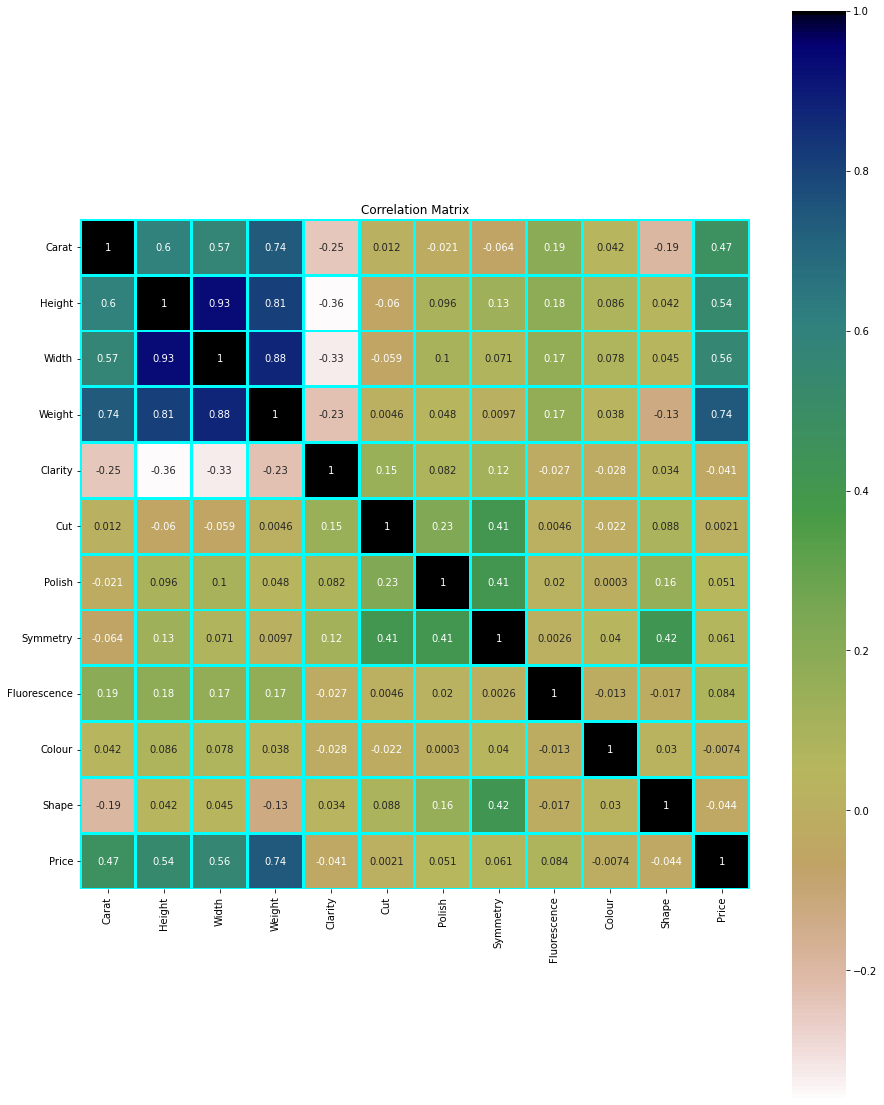

In [ ]:
Correlation_Matrix(df)

In [ ]:
X = df.drop("Price",axis=1)
y = df.Price


In [ ]:
y.name

'Price'

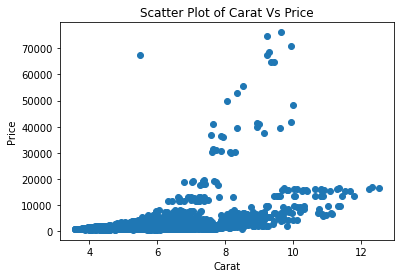

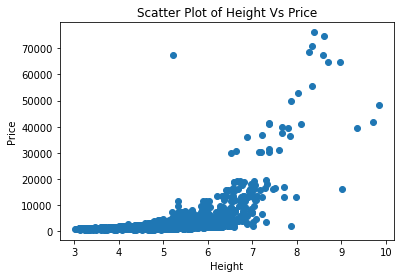

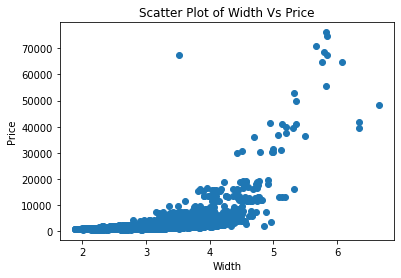

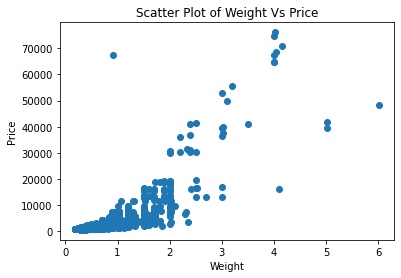

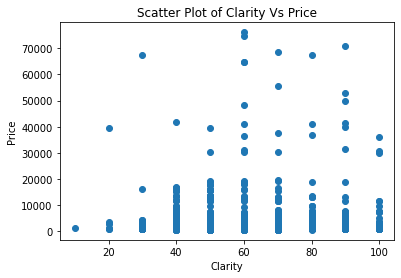

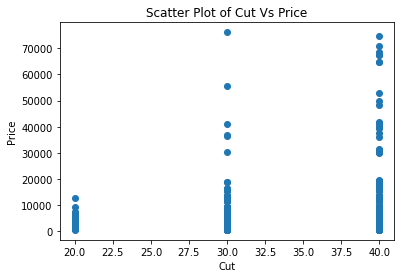

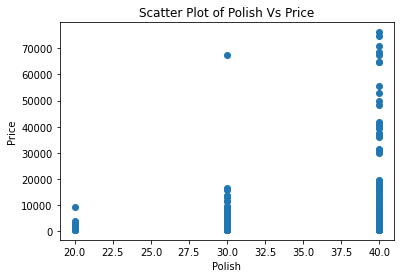

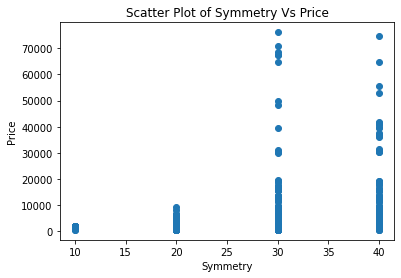

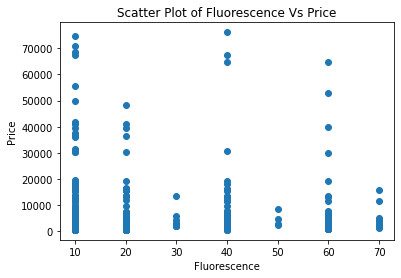

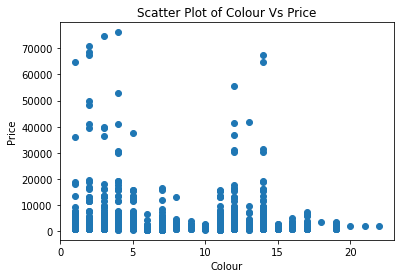

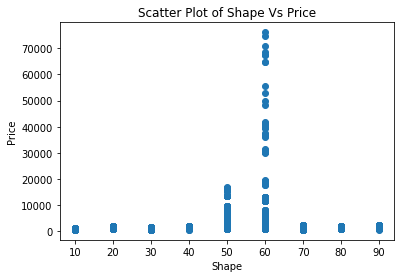

In [ ]:
Scatterplot(X,y)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [ ]:
x_train.shape

(5876, 11)

In [ ]:
x_test.shape

(1469, 11)

In [ ]:
std_scaler = StandardScaler()
mms = MinMaxScaler((0,0.5))
std_scaler.fit(x_train)
mms.fit(x_train)

MinMaxScaler(feature_range=(0, 0.5))

In [ ]:
x_tr = std_scaler.transform(x_train)
x_ts = std_scaler.transform(x_test)


x_tr_mms = mms.transform(x_train)
x_ts_mms = mms.transform(x_test)

# Scaling after EDA

In [ ]:
x_tr_eda = pd.DataFrame(x_tr,columns=X.columns)
x_ts_eda = pd.DataFrame(x_ts,columns=X.columns)


In [ ]:
x_tr_eda_df = x_tr_eda.copy()
x_tr_eda_df["Price"] = y_train

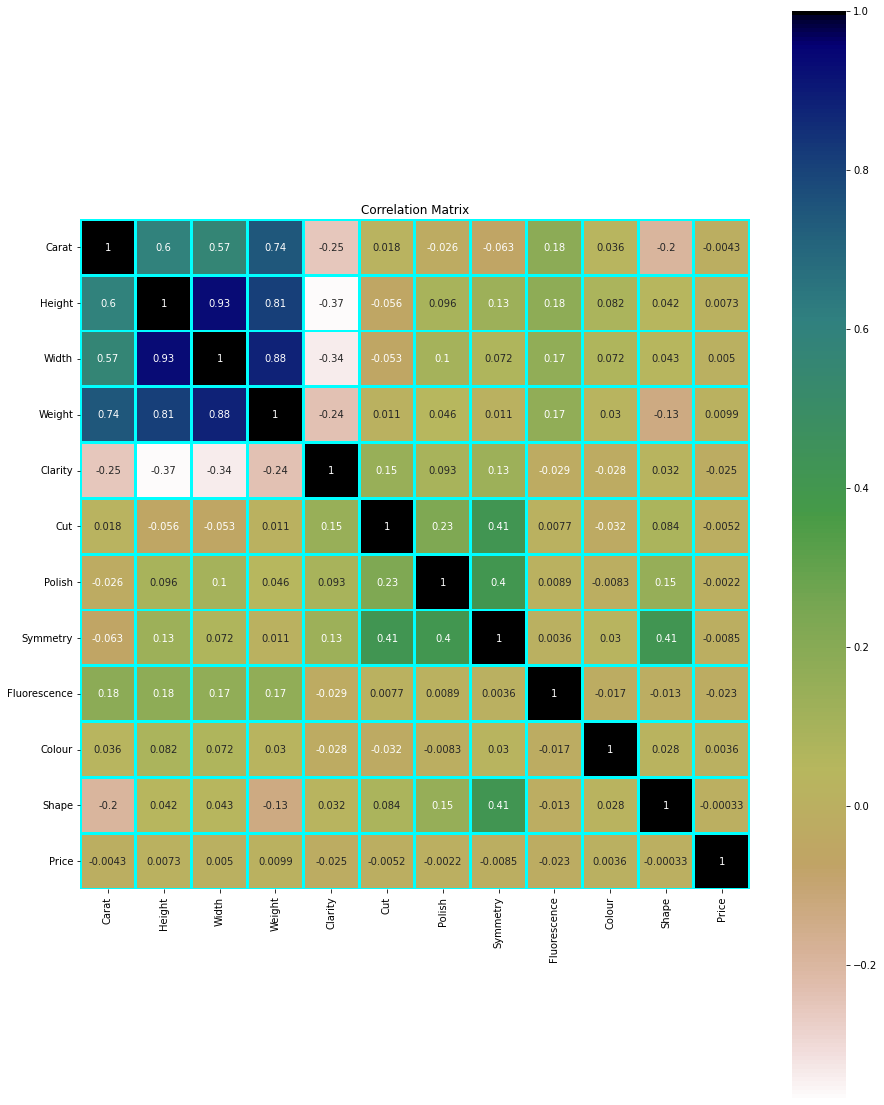

In [ ]:
Correlation_Matrix(x_tr_eda_df)

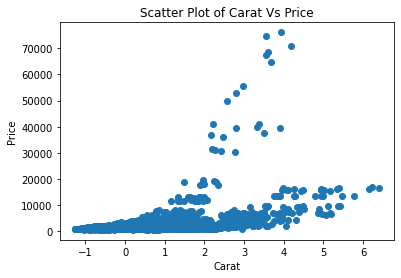

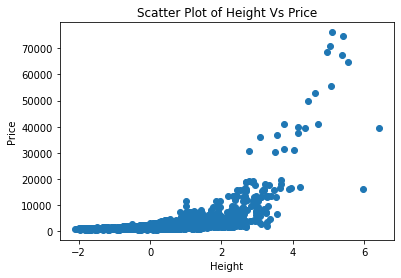

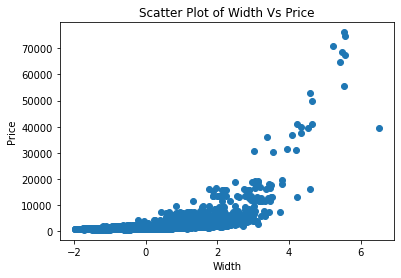

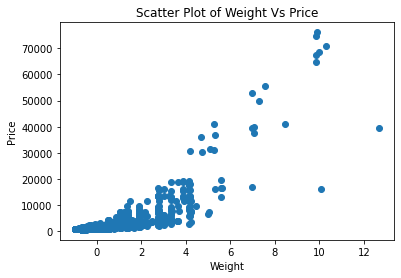

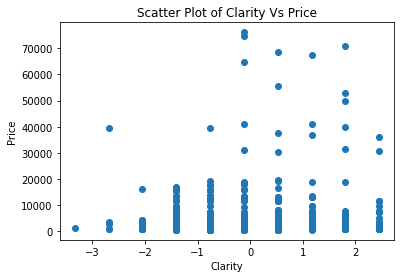

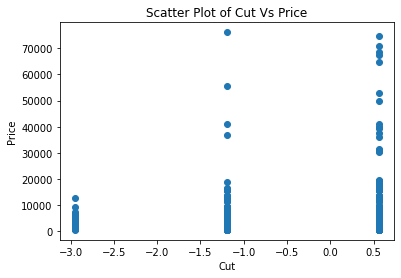

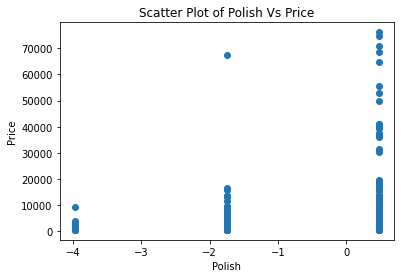

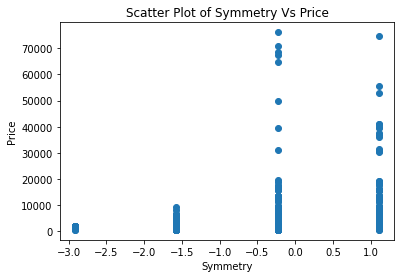

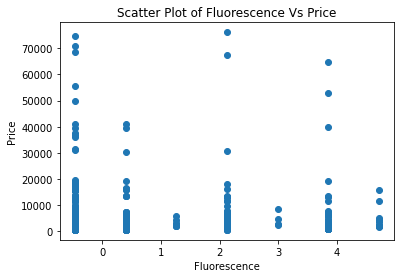

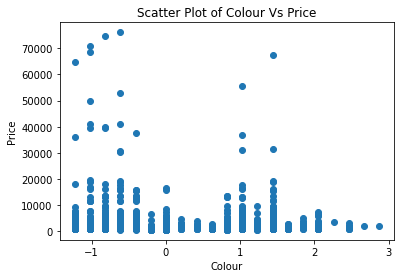

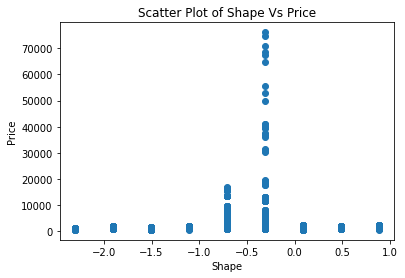

In [ ]:
Scatterplot(x_tr_eda,y_train)

In [ ]:
x_ts

array([[-0.97539709, -0.84574099, -1.0099753 , ..., -0.47247866,
        -0.61252481,  0.88501812],
       [ 0.14195027,  0.90022176,  0.57177555, ..., -0.47247866,
         1.43678098,  0.88501812],
       [ 0.5974842 ,  0.56445969,  0.89574862, ..., -0.47247866,
         1.02691983, -0.31092664],
       ...,
       [-0.9324222 , -0.76515809, -1.04808977, ..., -0.47247866,
         1.02691983,  0.88501812],
       [-0.98399207, -0.85917147, -0.9146891 , ..., -0.47247866,
        -1.22731654,  0.88501812],
       [-0.72614268, -0.57713134, -0.24768573, ..., -0.47247866,
         1.02691983,  0.48636987]])

In [ ]:
x_tr

array([[ 0.30525489, -1.46354319, -1.23866217, ..., -0.47247866,
         1.43678098, -1.5068714 ],
       [-0.51986317, -0.25479975,  0.51460383, ..., -0.47247866,
         0.82198925,  0.48636987],
       [ 0.76078882,  0.79277789,  1.08632101, ..., -0.47247866,
        -0.40759423, -0.31092664],
       ...,
       [-0.6745728 , -0.3756741 , -0.49542984, ...,  3.85869855,
        -0.61252481,  0.88501812],
       [-0.64878786, -0.34881313, -0.53354432, ...,  2.12622767,
        -0.61252481,  0.88501812],
       [-1.15589167, -1.15464209, -0.41920088, ..., -0.47247866,
         0.82198925,  0.48636987]])

In [ ]:
x_tr_mms

array([[0.20492721, 0.07559055, 0.08744395, ..., 0.        , 0.65      ,
        0.25      ],
       [0.09742441, 0.21732283, 0.29372197, ..., 0.        , 0.5       ,
        0.875     ],
       [0.26427772, 0.34015748, 0.36098655, ..., 0.        , 0.2       ,
        0.625     ],
       ...,
       [0.07726764, 0.20314961, 0.17488789, ..., 0.83333333, 0.15      ,
        1.        ],
       [0.0806271 , 0.20629921, 0.17040359, ..., 0.5       , 0.15      ,
        1.        ],
       [0.01455767, 0.11181102, 0.1838565 , ..., 0.        , 0.5       ,
        0.875     ]])

# Model Selection

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb

In [ ]:
results = {}
models = {"Lasso": Lasso() , "Ridge":Ridge(), "ElasticNet":ElasticNet(),
         "DTree": DecisionTreeRegressor(), "KNR": KNeighborsRegressor(),
          "GBR": GradientBoostingRegressor(), "Ada": AdaBoostRegressor(),
          "XGBRF": xgb.XGBRFRegressor(),"Random Forest": RandomForestRegressor(),
          "XGB": xgb.XGBRegressor()
         
         }



In [ ]:
for model in models:
    kfold  = KFold(n_splits=50,random_state=20,shuffle=True)
    res = cross_val_score(models[model], x_tr_mms,y_train,cv=kfold, scoring="neg_mean_squared_error")
    results[model]=res
    

[12:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
for i in results:
    print(i, round(results[i].mean()))

Lasso -3672800
Ridge -4746719
ElasticNet -11228868
DTree -1306002
KNR -2617903
GBR -1178345
Ada -3476775
XGBRF -1927655
Random Forest -1301879
XGB -1196938


In [ ]:
max(np.array(list(results.values())).mean(axis=1).round()) # mse

-1178345.0

In [ ]:
sorted(list(np.mean(list(results.values()) ,axis=1).round()))

[-11228868.0,
 -4746719.0,
 -3672800.0,
 -3476775.0,
 -2617903.0,
 -1927655.0,
 -1306002.0,
 -1301879.0,
 -1196938.0,
 -1178345.0]

In [ ]:
# Standard Scaler===========(1,-1)
# 3. Random Forest -1345487
# 2. XGB           -1211434.0 
# 1. GBR           -1063811.0
# ============================

# MinmAX Scaler=========== (0,1)
# 3. Random Forest -1328751.0    
# 2. XGB           -1478738              
# 1. GBR:          -1149087.0
# ============================

# MinmAX Scaler=========== (0,0.5)
# 3. Random Forest   -1276965    
# 2. XGB             -1207130  
# 1. GBR             -1062171
# ============================



# MinmAX Scaler=========== (0,0.2)
# 3. Random Forest   -1325791    
# 2. XGB             -1211627  
# 1. GBR             -1099665
# ============================

# 0.5 scaling is good enough and Top 3 Regressor are GBR,XGB,RF ====> Choose GBR

# As seen above Th Minimum MSE is of Random Forest and the Gradient Boosting 